In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset into pandas dataframe
data = pd.read_csv('dataset.csv')

In [3]:
#Finding out the data present in the dataset
data.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [4]:
#Finding the number of rows and columns in the dataset
data.shape

(200000, 2)

In [5]:
#Deriving the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [6]:
data.tail()

,text,humor
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False
199999,An irish man walks on the street and ignores a...,True


In [7]:
#Finding the column names present in the dataset
data.columns

Index(['text', 'humor'], dtype='object')

In [8]:
#Finding the count of null values present in the dataset
data.isnull().sum()

text     0
humor    0
dtype: int64

In [9]:
#Finding the count of each category present in humor column
data['humor'].value_counts()

True     100000
False    100000
Name: humor, dtype: int64

In [10]:
#Creating a new dataframe which has the count of values presnet in the 'humor' column
data1 = data['humor'].value_counts()

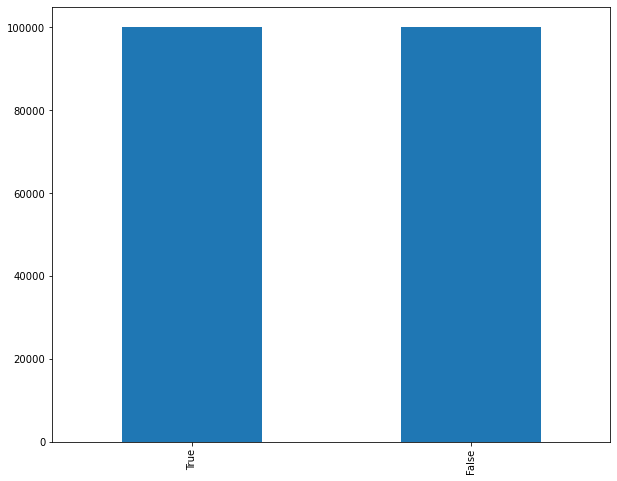

In [11]:
#Creating a bar plot to visualize the count of each category 
fig = plt.figure(figsize = (10,8))
data1.plot.bar()
plt.show()

In [12]:
#Creating a new dataframe which has the observations where the humor value is True
humor_data = data[data['humor'] == True]

In [13]:
humor_data

,text,humor
2,What do you call a turtle without its shell? d...,True
6,What is a pokemon master's favorite kind of pa...,True
7,Why do native americans hate it when it rains ...,True
9,"My family tree is a cactus, we're all pricks.",True
13,How are music and candy similar? we throw away...,True
...,...,...
199990,Where do eskimos keep their money? in snowbanks.,True
199993,What did the child with no arms get for christ...,True
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True


In [14]:
#Importing libraries for visualization
import wordcloud
from wordcloud import WordCloud,STOPWORDS

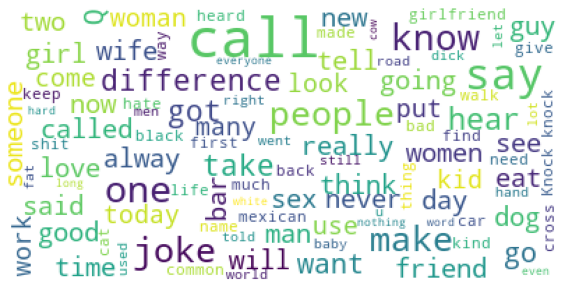

In [15]:
#Creating a visualization of the words which would occur in a text when there is humor in text
texts = ' '.join(humor_data['text'])
stopwords = STOPWORDS
wordcloud = WordCloud(background_color = 'white',
                     stopwords = stopwords,
                     max_words = 100,
                     max_font_size = 40,
                     random_state = 42).generate(texts)
plt.figure(figsize = (10,10),facecolor = None)
plt.axis('off')
plt.imshow(wordcloud)

In [16]:
#Creating a new dataframe which has the observations where the humor value is False 
nonhumor_data = data[data['humor']==False]
nonhumor_data

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
5,"Martha stewart tweets hideous food photo, twit...",False
...,...,...
199991,Meet the billionaire who controls your ketchup...,False
199992,North korea stages large-scale artillery drill...,False
199994,Elizabeth taylor looked amazing even without d...,False
199995,Conor maynard seamlessly fits old-school r&b h...,False


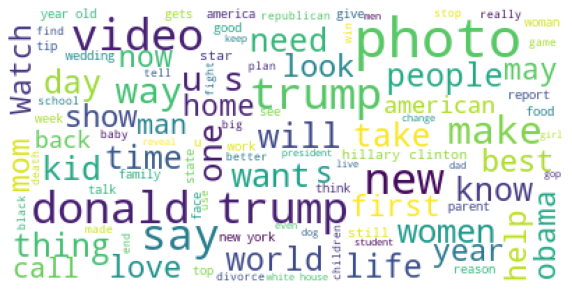

In [17]:
#Creating a visualization of the words which would occur in a text when there is no humor in text
texts = ' '.join(nonhumor_data['text'])
stopwords = STOPWORDS
wordcloud = WordCloud(background_color = 'white',
                     stopwords = stopwords,
                     max_words = 100,
                     max_font_size = 40,
                     random_state = 42).generate(texts)
plt.figure(figsize = (10,10),facecolor = None)
plt.axis('off')
plt.imshow(wordcloud)

In [18]:
#Adding a new column to the dataset named question. 
#If there is a question mark present in the text,it means that there is humor in the text.
#The value True will be included in the question column for that particular text,likewise if there is no question mark,
#False value will be included
data['question'] = data['text'].str.contains('\?')

In [19]:
data

,text,humor,question
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,False
1,Watch: darvish gave hitter whiplash with slow ...,False,False
2,What do you call a turtle without its shell? d...,True,True
3,5 reasons the 2016 election feels so personal,False,False
4,"Pasco police shot mexican migrant from behind,...",False,False
...,...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False,False
199996,How to you make holy water? you boil the hell ...,True,True
199997,How many optometrists does it take to screw in...,True,True
199998,Mcdonald's will officially kick off all-day br...,False,False


In [20]:
#Getting the count of the observations by analysing the question and humor columns
data.groupby(['question','humor']).count()

text
question humor       
False    False  94745
         True   46944
True     False   5255
         True   53056

In [21]:
#Importing necessary natural language processing libraries
import re
import string
import nltk


In [22]:
from nltk.corpus import stopwords

In [23]:
stemmer = nltk.SnowballStemmer('english')

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.util import pr



In [26]:

stopword = set(stopwords.words('english'))

In [27]:
#"text" column before cleaning
data["text"]

0         Joe biden rules out 2020 bid: 'guys, i'm not r...
1         Watch: darvish gave hitter whiplash with slow ...
2         What do you call a turtle without its shell? d...
3             5 reasons the 2016 election feels so personal
4         Pasco police shot mexican migrant from behind,...
                                ...                        
199995    Conor maynard seamlessly fits old-school r&b h...
199996    How to you make holy water? you boil the hell ...
199997    How many optometrists does it take to screw in...
199998    Mcdonald's will officially kick off all-day br...
199999    An irish man walks on the street and ignores a...
Name: text, Length: 200000, dtype: object

In [28]:
#Defining a function clean which takes the test from the data as input.
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text


In [29]:
#Applying the clean function on each text present in the dataset
data["text"] = data["text"].apply(clean)

In [33]:
#"text" column after cleaning
data["text"]

0                            joe biden rule  bid guy im run
1             watch darvish gave hitter whiplash slow pitch
2                             call turtl without shell dead
3                               5 reason  elect feel person
4         pasco polic shot mexican migrant behind new au...
                                ...                        
199995    conor maynard seamless fit oldschool rb hit dr...
199996                            make holi water boil hell
199997    mani optometrist take screw lightbulb one two ...
199998        mcdonald offici kick allday breakfast octob 6
199999    irish man walk street ignor bar muahahaha like...
Name: text, Length: 200000, dtype: object

In [34]:
#Importing libraries for model building and splitting the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
x = np.array(data["text"])
y = np.array(data["humor"])

In [40]:
#Transforming the "text" column using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
sc = CountVectorizer()
X = sc.fit_transform(x)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 2)

In [45]:
#Training the model
ab = LogisticRegression()
ab.fit(X_train,y_train)

In [47]:
#Training accuracy
ab.score(X_train,y_train)

0.9319477611940299

In [50]:
#Testing the model by giving an input
text1 = "I like sleeping.I just dont like going to sleep."
data = sc.transform([text1]).toarray()
print(ab.predict(data))

[ True]


In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
#Storing the model predictions on test data in another variable and comparing the results between predicted values and test values
y_pred = ab.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [ True  True]
 [ True  True]
 ...
 [False False]
 [False False]
 [ True  True]]


In [53]:
#Confusoion matrix which tells us about the True positive and True negative, False positive and Falsw negative
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29764  3309]
 [ 3169 29758]]


In [54]:
#Model accuracy 
accuracy_score(y_test,y_pred)

0.9018484848484849